Problem Statement:
We have wholesale dataset each record has data on various customers annual spending amount

Goal of this project is to desscribe the variation in diffrent types of customers a wholesale customer intract with


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

# Reading Data

In [2]:
customers=pd.read_csv('Wholesale customers data.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
customers.shape

(440, 8)

In [4]:
#dropping channel and region as we are not considering demographic conditions
customers.drop(columns={'Channel','Region'},inplace=True)

In [5]:
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# data preprocessing

In [6]:
#all information related to customer data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
#checking statistical summary of data
customers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
#checking missing values in customer data
customers.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

So we have no missing vale in our data

# Exploratory data analysis

<AxesSubplot:>

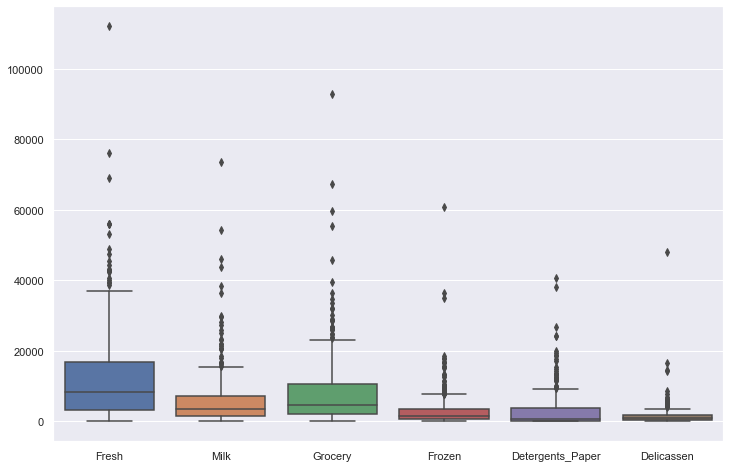

In [9]:
#checking distribution of our data
plt.figure(figsize=(12,8))
sns.boxplot(data=customers,orient='v')

We can see data is not scaled and also we have outliers in our data

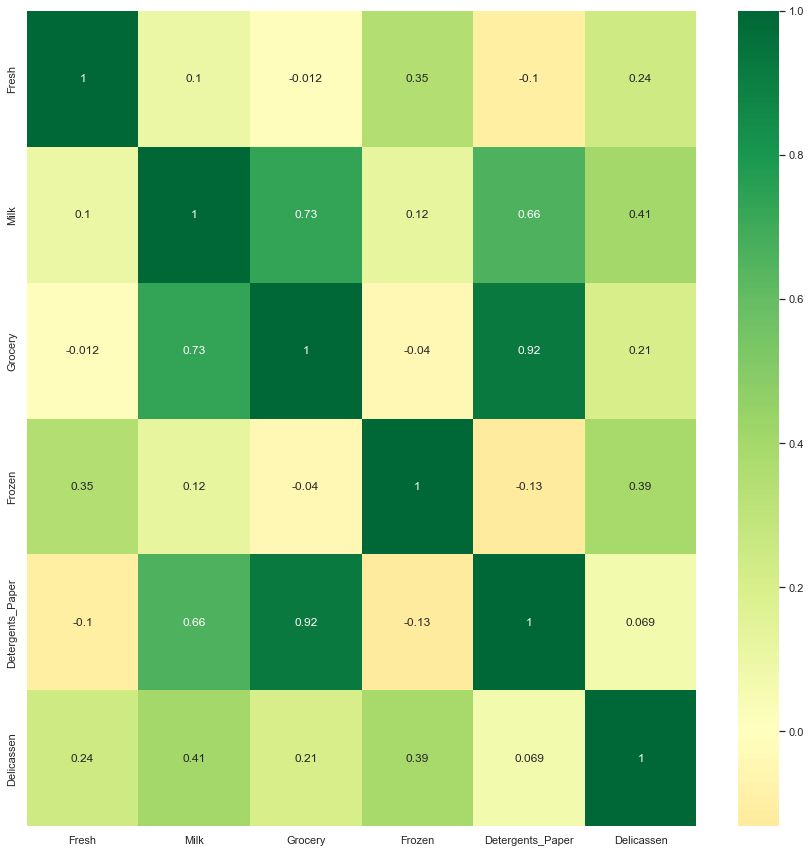

In [10]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(customers.corr(), annot=True,cmap='RdYlGn',center=0) 

In [11]:
#Now as we can see that 'grocery' and 'milk' as highly correlated so we need to drop one of them
customers.drop('Grocery',axis=1,inplace=True)

In [12]:
customers.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,12669,9656,214,2674,1338
1,7057,9810,1762,3293,1776
2,6353,8808,2405,3516,7844
3,13265,1196,6404,507,1788
4,22615,5410,3915,1777,5185


##### So our data has outlier and diffrent scale so i am using robust scaler to scale our features

In [13]:
trans=RobustScaler()

In [14]:
X=trans.fit_transform(customers)

In [15]:
X

array([[ 0.30168043,  1.06571214, -0.46657183,  0.50678671,  0.2638102 ],
       [-0.1048095 ,  1.09293385,  0.08392603,  0.67567015,  0.5740085 ],
       [-0.15580183,  0.91581599,  0.3125889 ,  0.73651183,  4.87145892],
       ...,
       [ 0.43654933,  2.09660171, -0.38726885,  3.826342  ,  0.63845609],
       [ 0.12936404, -0.29095409, -0.17354196, -0.176932  ,  0.82117564],
       [-0.41409532, -0.34097839, -0.51955903, -0.0926267 , -0.64695467]])

# Model Building

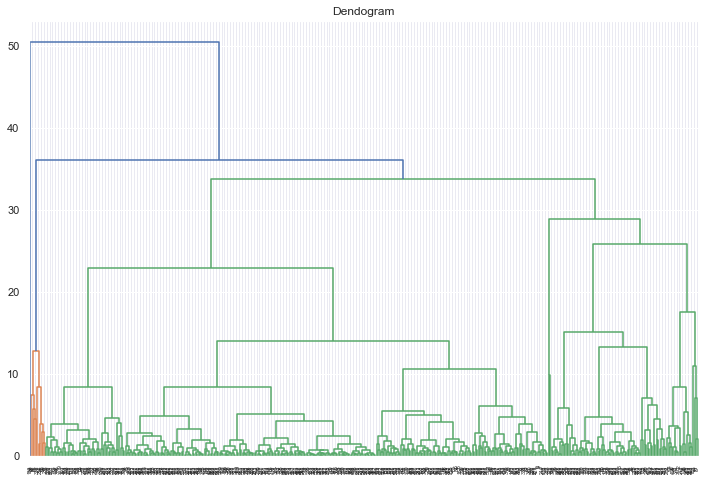

In [16]:
#creating dendogram
plt.figure(figsize=(12,8))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.show()

In [17]:
#creating model
model=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
y_out=model.fit_predict(X)

##### Using PCA to display result to reduce dimension off result

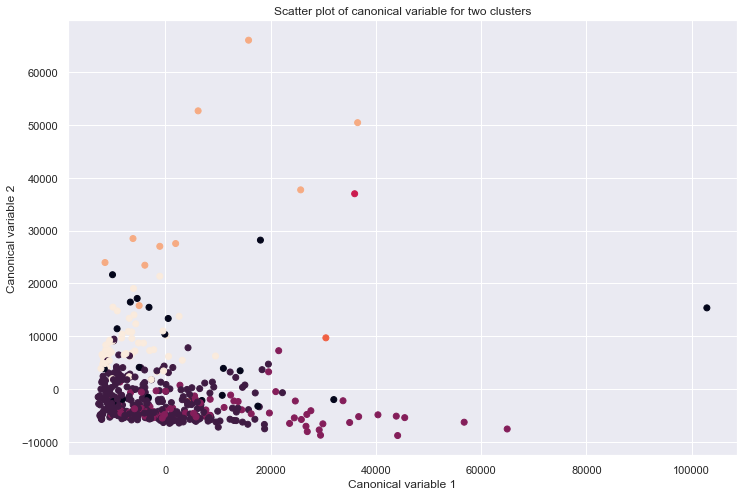

In [18]:
pca_2=PCA(2)  #for 2d display
plt.figure(figsize=(12,8))
plot_columns=pca_2.fit_transform(customers)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatter plot of canonical variable for two clusters')
plt.show()